Make sure DMBA package is available

In [1]:
pip install dmba

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 11.2 MB/s eta 0:00:00


In [ ]:
# !apt-get -qq install -y graphviz && pip install mord
# import mord

In [17]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from dmba import classificationSummary
from dmba.metric import AIC_score
from sklearn import metrics
import dmba
import matplotlib.pyplot as plt

In [7]:
bank_df = dmba.load_data('UniversalBank.csv') #read data
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True) #drop undesired columns
bank_df.columns = [c.replace(' ', '_') for c in bank_df.columns]
bank_df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [9]:
y = bank_df['Personal_Loan'] #define the outcome variable
X = bank_df.drop(columns=['Personal_Loan']) #define the predictors

# partition data
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [10]:
logit_reg = LogisticRegression()
logit_reg.fit(train_X, train_y)

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose())
print()
print('AIC', AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1))

intercept  -12.035419247249383
            Age  Experience    Income    Family     CCAvg  Education  \
coeff -0.067246    0.068088  0.053365  0.714846  0.187301   1.833853   

       Mortgage  Securities_Account  CD_Account    Online  CreditCard  
coeff  0.000673           -1.120313    3.752944 -0.632749   -1.081121  

AIC -309.8110859962944


## Table 10.3
Predict to get the probabilities

In [11]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y,
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })

# display four different cases
interestingCases = [2764, 932, 2721, 702]
print(logit_result.loc[interestingCases])

      actual      p(0)      p(1)  predicted
2764       0  0.972020  0.027980          0
932        0  0.641431  0.358569          0
2721       1  0.039529  0.960471          1
702        1  0.962016  0.037984          0


## Table 10.4

In [12]:
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9527)

       Prediction
Actual    0    1
     0 2674   39
     1  103  184
Confusion Matrix (Accuracy 0.9505)

       Prediction
Actual    0    1
     0 1783   24
     1   75  118


In [13]:
#define metrics
y_pred_proba = logit_reg.predict_proba(valid_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(valid_y,  y_pred_proba)

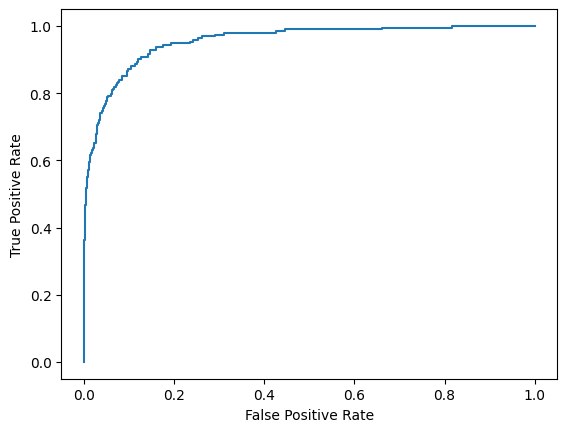

In [18]:
#create ROC curve\
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()